# AIM : Trying out different Methods of Data Visualization

## Importing required Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Training Dataset 

In [2]:
passengers = pd.read_csv('titanicTrainingData.csv')
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Plotting Correspondance

1. Neither *Name* nor *PassengerId* will influence whether the person survives or dies, hence they can be dropped. This is also true for *Ticket* and *Cabin*.
2. Since it is difficult to work with `str` datatype, *Sex* and *Embarked* are changed to `numeric` datatype.
3. In *Sex* column, *female* is Encoded as 1 and *male* is Encoded as 2.
4. *Embarked* may have some correspondance to survival, although somewhat vague, so it is retained.
    1. *C* is Encoded as 1
    2. *Q* is Encoded as 2
    3. *S* is Encoded as 3

In [3]:
factors = passengers.drop(['Name','PassengerId','Ticket','Cabin'], axis=1)
factors['Sex'] = factors['Sex'].replace(['female','male'],[1,2])
factors['Embarked'] = factors['Embarked'].replace(['C','Q','S'],[1,2,3])
factors

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,22.0,1,0,7.2500,3.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,3.0
3,1,1,1,35.0,1,0,53.1000,3.0
4,0,3,2,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...
886,0,2,2,27.0,0,0,13.0000,3.0
887,1,1,1,19.0,0,0,30.0000,3.0
888,0,3,1,NaN,1,2,23.4500,3.0
889,1,1,2,26.0,0,0,30.0000,1.0


   ## Plotting the correlation with *Survived* class

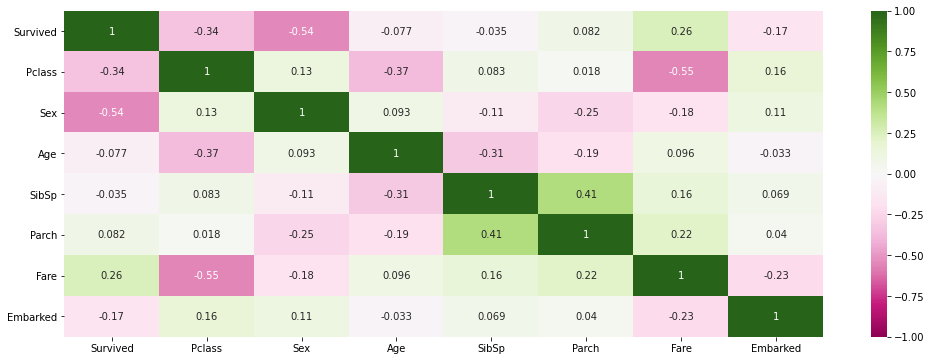

In [4]:
plt.figure(figsize=(17,6))
heatmap = sns.heatmap(factors.corr(), vmin=-1, vmax=1, annot=True, cmap='PiYG')

Thus we can conclude that *Survived* passangers have a strong correlation with *Pclass* and *Sex* and *Fare* to some extent and, a weaker correlation with *Embarked* and negligible correlation with others.

## Pairplots among all possible Factors

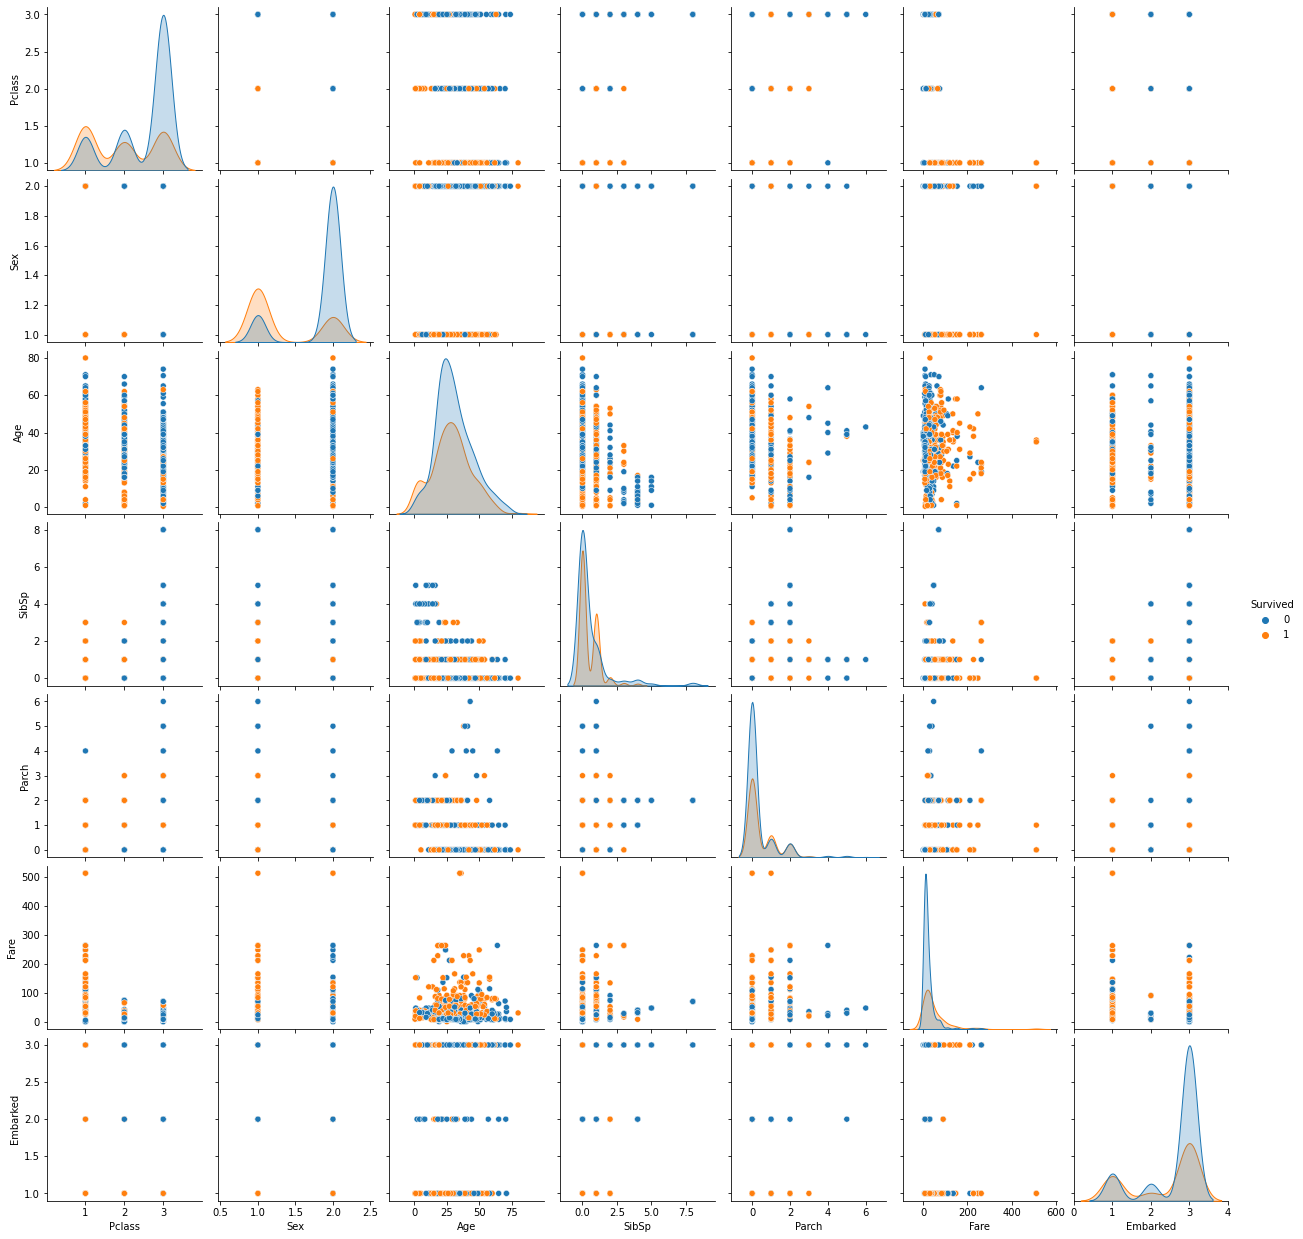

In [5]:
sns.pairplot(factors, hue='Survived')
plt.show()

## Plotting *Survived* passengers w.r.t *Sex*

### 1. Violin Plot

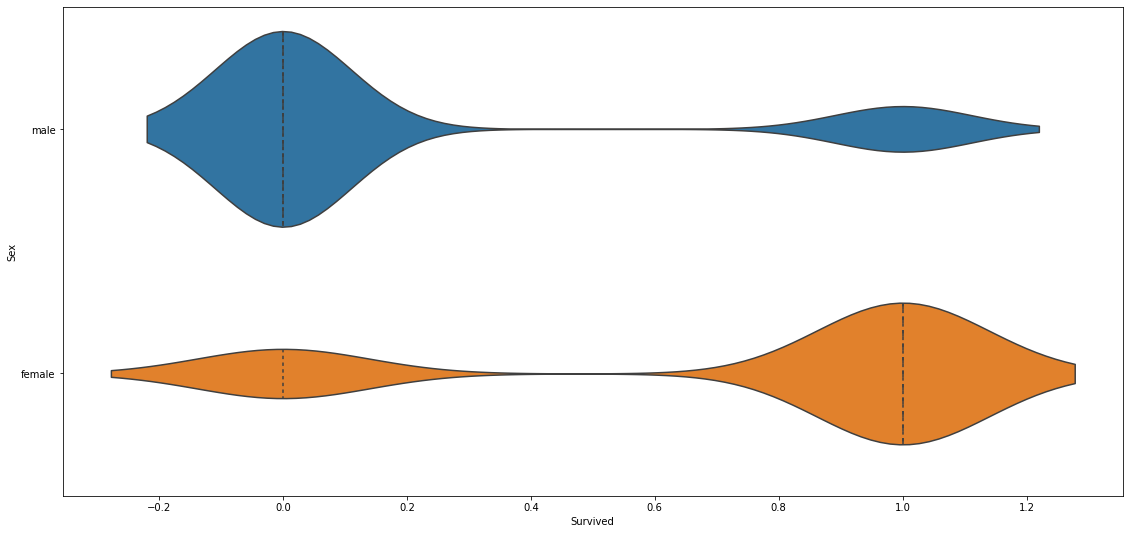

In [6]:
plt.figure(figsize=(19,9))
sns.violinplot(x="Survived", y="Sex", inner='quartile', data=passengers)
plt.show()

### 2. Line Plot

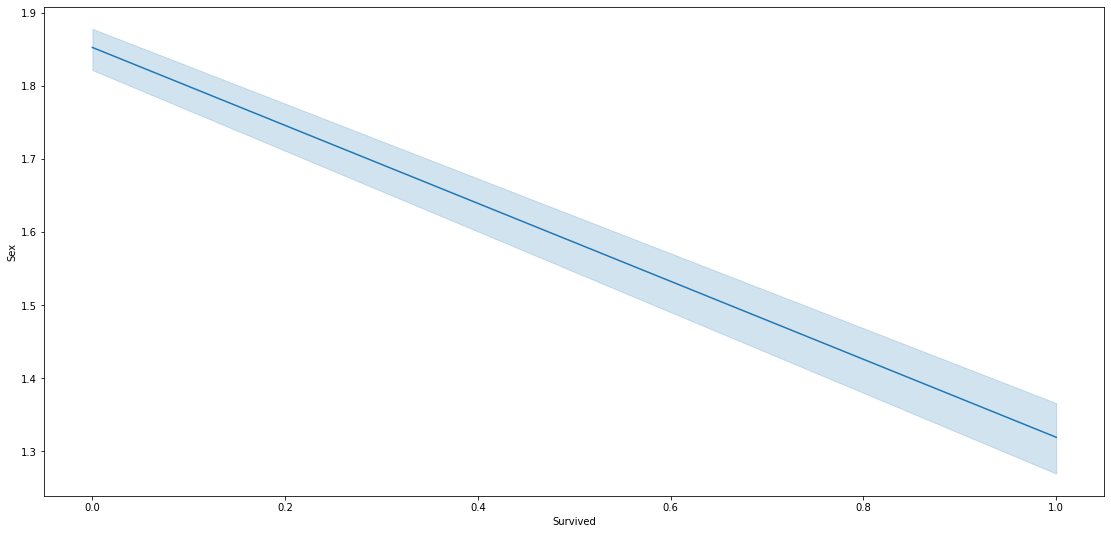

In [7]:
plt.figure(figsize=(19,9))
sns.lineplot(x="Survived",y="Sex",data=factors)
plt.show()

## Plotting *Survived* passengers w.r.t *Fare*

### 1. Violin Plot

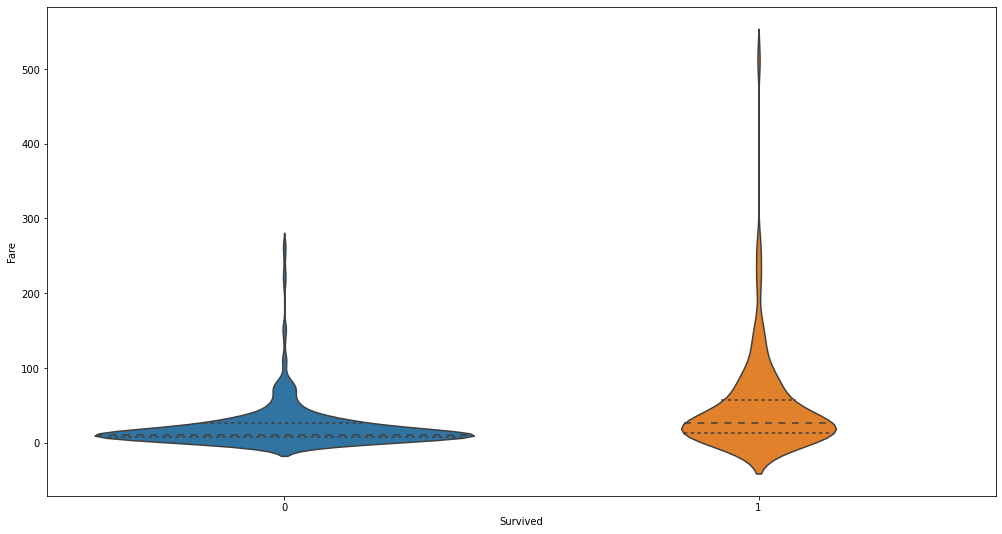

In [8]:
plt.figure(figsize=(17,9))
sns.violinplot(x="Survived", y="Fare", inner='quartile', data=passengers)
plt.show()

### 2. Line Plot

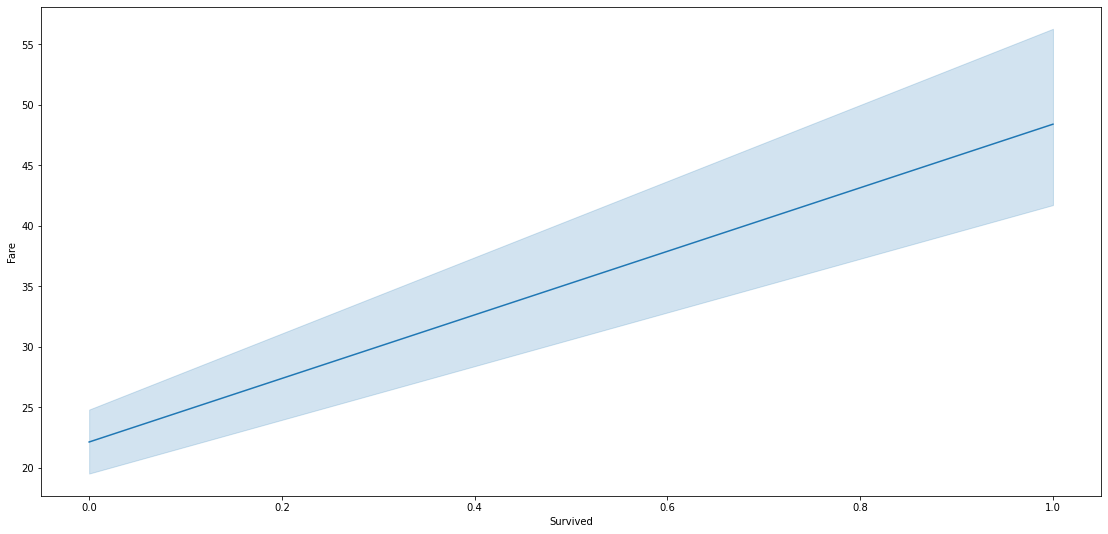

In [9]:
plt.figure(figsize=(19,9))
sns.lineplot(x="Survived",y="Fare",data=factors)
plt.show()

## Plotting *Survived* passengers w.r.t *Pclass*

### 3. Violin Plot

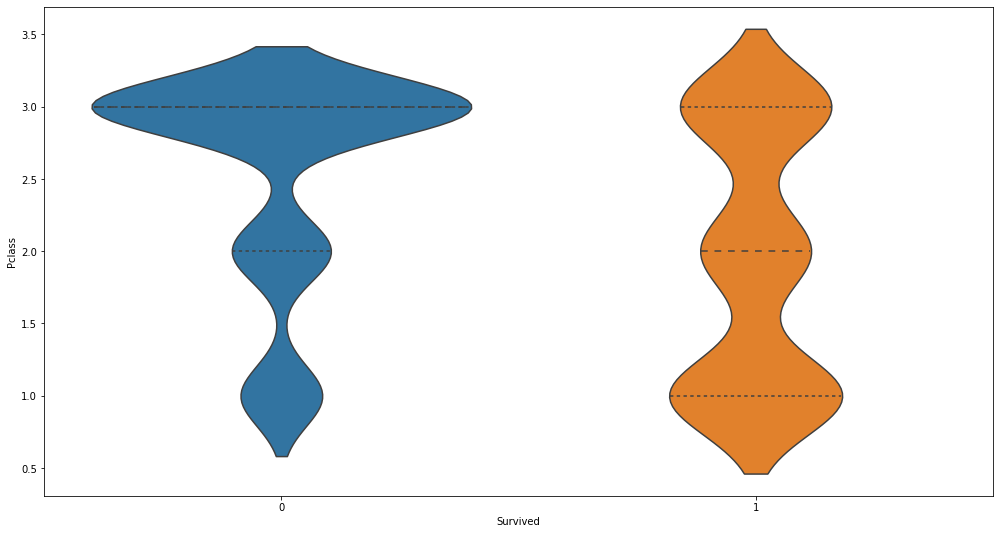

In [10]:
plt.figure(figsize=(17,9))
sns.violinplot(x="Survived", y="Pclass", inner='quartile', data=passengers)
plt.show()

### 2. Line Plot

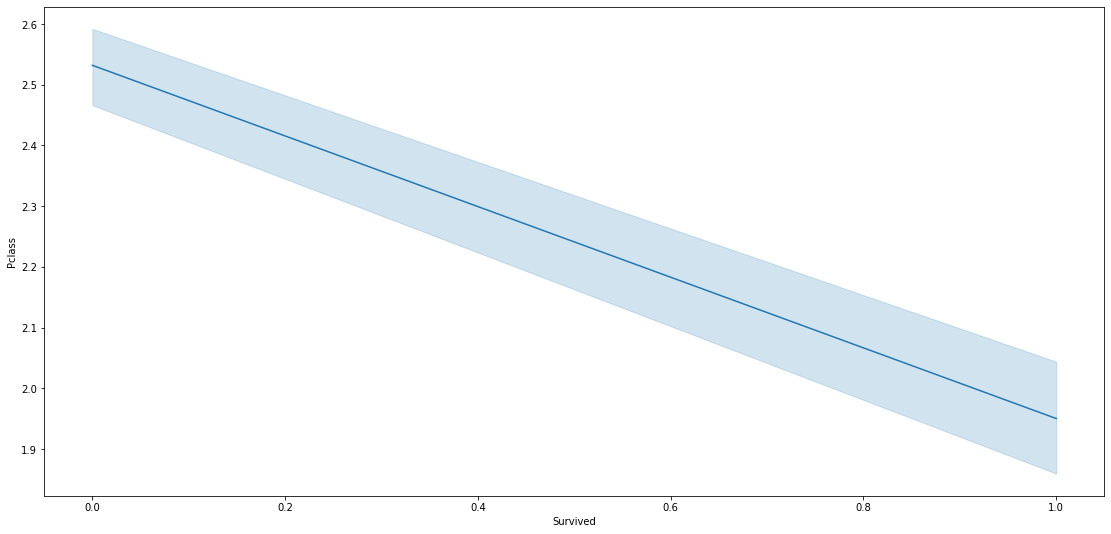

In [11]:
plt.figure(figsize=(19,9))
sns.lineplot(x="Survived",y="Pclass",data=factors)
plt.show()

## Ploting Fare v/s Sex

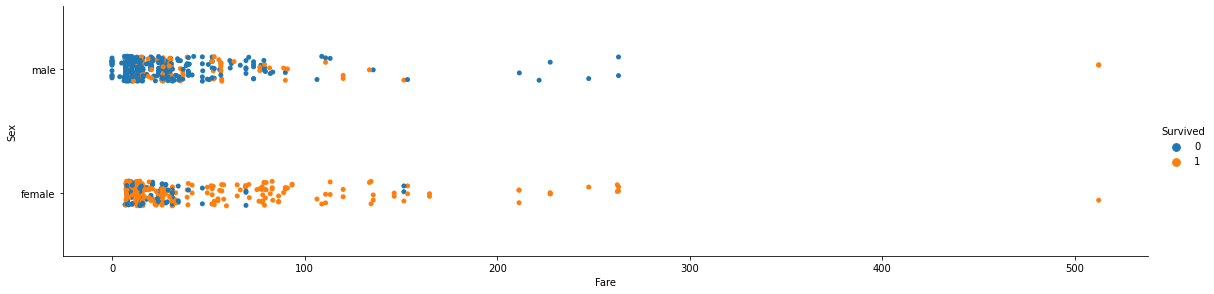

In [12]:
sns.catplot(x='Fare',y='Sex',hue='Survived',data=passengers,height=4,aspect=4)
plt.show()

## Ploting Sex v/s Pclass

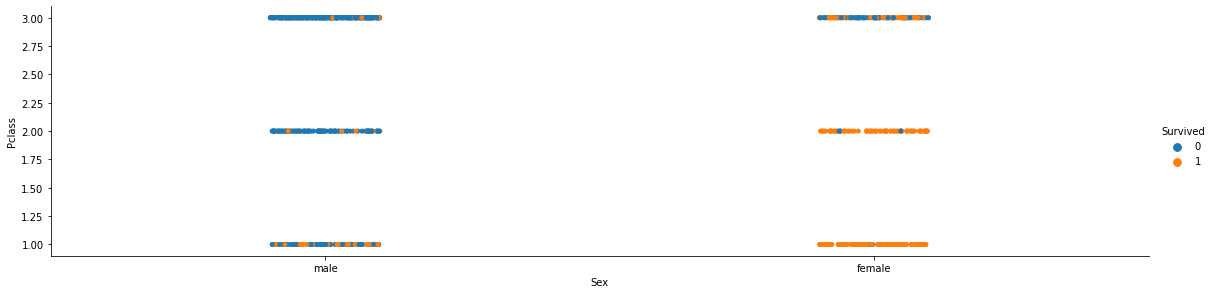

In [13]:
sns.catplot(x='Sex',y='Pclass',hue='Survived',data=passengers,height=4,aspect=4)
plt.show()

## Ploting Fare v/s Pclass

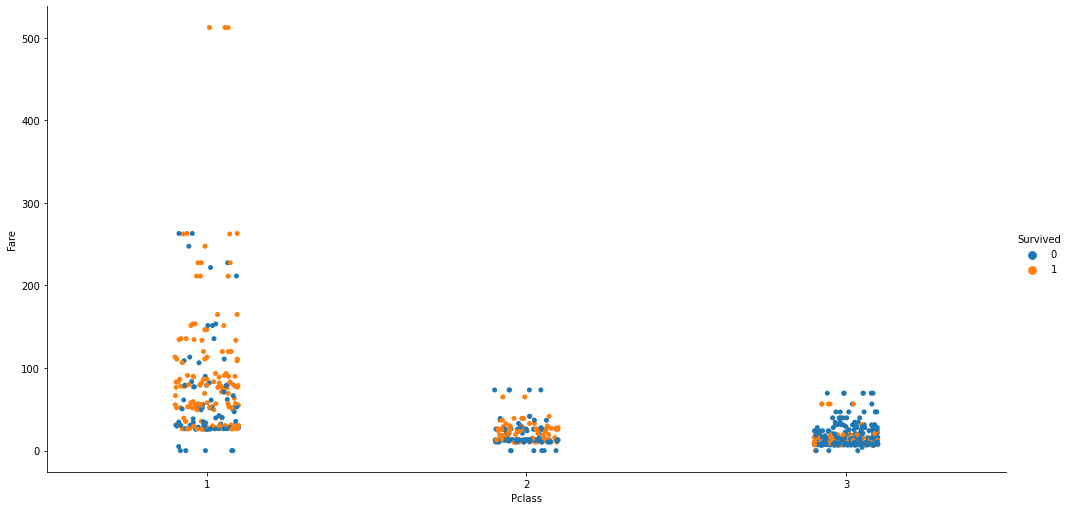

In [14]:
sns.catplot(x='Pclass',y='Fare',hue='Survived',data=passengers,height=7,aspect=2)
plt.show()

## Making of Survival and Death Tables

In [15]:
survived = passengers.loc[passengers['Survived']==1]
dead = passengers.loc[passengers['Survived']==0]
factors.groupby(by='Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,549,549,424,549,549,549,549
1,342,342,290,342,342,342,340


## Survival and Deaths based on Embarkment

In [16]:
passengers['Embarked'].value_counts(normalize=True).sort_index()

C    0.188976
Q    0.086614
S    0.724409
Name: Embarked, dtype: float64

In [17]:
survived['Embarked'].value_counts().sort_index()

C     93
Q     30
S    217
Name: Embarked, dtype: int64

In [18]:
survived['Embarked'].value_counts(normalize=True).sort_index()

C    0.273529
Q    0.088235
S    0.638235
Name: Embarked, dtype: float64

## Survival and Death based on Gender

In [19]:
survived['Sex'].value_counts().sort_index()

female    233
male      109
Name: Sex, dtype: int64

In [20]:
survived['Sex'].value_counts(normalize=True).sort_index()

female    0.681287
male      0.318713
Name: Sex, dtype: float64

## Survival and Death based on PClass

In [21]:
passengers['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [22]:
survived['Pclass'].value_counts().sort_index()

1    136
2     87
3    119
Name: Pclass, dtype: int64

In [23]:
survived['Pclass'].value_counts(normalize=True).sort_index()

1    0.397661
2    0.254386
3    0.347953
Name: Pclass, dtype: float64

## Survival and Death based on Siblings and Spouse

In [24]:
passengers['SibSp'].value_counts().sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [25]:
survived['SibSp'].value_counts().sort_index()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [26]:
survived['SibSp'].value_counts(normalize=True).sort_index()

0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
Name: SibSp, dtype: float64